### 🖥️분류 (Classification) 프로젝트 2
#### 🌠천체 분류 예측

#### ✏️feature

- obj_ID: 대상의 고유 id
- alpha: 측정 위치의 경도 (J2000 시간대 기준)
- delta: 측정 위치의 위도(천체의 위치가 적위(celestial equator)로부터 얼마나 떨어져있는지, J2000 시간대 기준)
- u: ultraviolet 필터에서의 광도
- g: green 필터에서의 광도
- r: red 필터에서의 광도
- i: near infrared 필터에서의 광도
- z: infrared 필터에서의 광도
- run_ID: 특정 스캔을 식별하는 데 사용되는 실행 번호
- rerun_ID: 이미지 처리 방법을 지정하는 재실행 번호
- cam_col: 실행 내에서 스캔 라인을 식별하는 데 사용되는 카메라 열
- field_ID: 각 필드를 식별하는 데 사용되는 필드 번호
- spec_obj_ID: 광학 분광 천체를 식별하는 데 사용되는 고유 ID. 동일한 값을 가진 두 가지 다른 관측은 같은 타겟을 가져야 함.
- redshift: 파장 증가에 기반한 레드시프트 값. 천체의 속도와 거리를 나타냄.
- plate: SDSS에서 각 plate를 식별하는 plate ID
- MJD: 수정 율리우스력에 기반한 날짜로, 주어진 SDSS 데이터가 촬영된 날짜
- fiber_ID: 각 관측에서 광을 초점면에 지시하는 광섬유를 식별하는 광섬유 ID

#### 🎈target

- class: 천체의 종류 (GALAXY(은하), STAR(별), QSO(퀘이사))

### 목차

1. 데이터 탐색 및 분포 시각화
2. 데이터 전처리 및 훈련/학습 데이터 분리
3. 모델 훈련, 예측 및 평가
   - DTC
   - SVC
   - KNN
   - Ensemble(Hard/soft Voting[DTC, SVC, KNN], Bagging[RFC], Boosting[AdaBoost, GBM, XGB, LightGBM])
4. 정확도 및 F1 score 비교 분석

#### 1. 데이터 탐색 및 분포 시각화

- 중복행, 결측치 검사
- 분포 시각화, 상관관계 확인 및 이상치 검사

- 데이터를 읽어옵니다.

In [2]:
import pandas as pd

s_df = pd.read_csv('./datasets/star_dataset.csv', low_memory=False)
s_df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


- 데이터의 정보를 확인해봅니다.

In [3]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

- 중복행을 검사합니다.

In [4]:
s_df.duplicated().sum()

0

- 결측치를 검사합니다.

In [5]:
s_df.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

- 히스토그램을 통해 각 feature별 분포를 확인해봅니다.

array([[<Axes: title={'center': 'obj_ID'}>,
        <Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'delta'}>, <Axes: title={'center': 'u'}>],
       [<Axes: title={'center': 'g'}>, <Axes: title={'center': 'r'}>,
        <Axes: title={'center': 'i'}>, <Axes: title={'center': 'z'}>],
       [<Axes: title={'center': 'run_ID'}>,
        <Axes: title={'center': 'rerun_ID'}>,
        <Axes: title={'center': 'cam_col'}>,
        <Axes: title={'center': 'field_ID'}>],
       [<Axes: title={'center': 'spec_obj_ID'}>,
        <Axes: title={'center': 'redshift'}>,
        <Axes: title={'center': 'plate'}>,
        <Axes: title={'center': 'MJD'}>],
       [<Axes: title={'center': 'fiber_ID'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

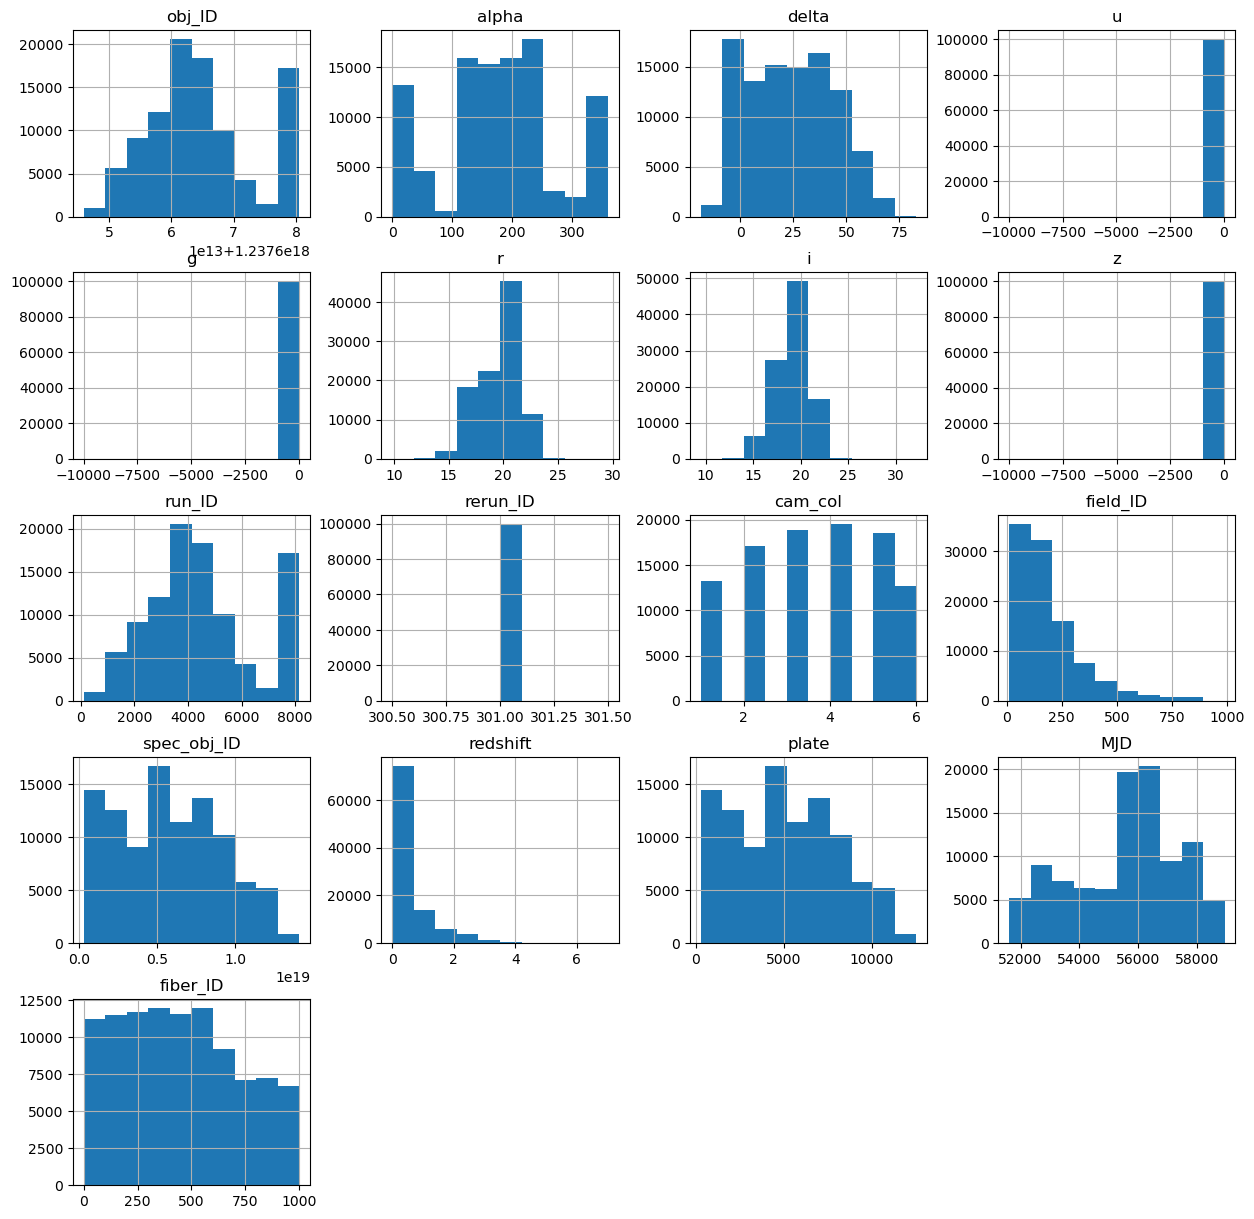

In [6]:
s_df.hist(figsize=(15, 15))

- 수치형 데이터에 대해 상관관계를 확인해봅니다.

In [7]:
corr_s_df = s_df.drop(labels=['class'], axis=1)
corr = corr_s_df.corr()
corr

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
obj_ID,1.000000,-0.013735,-0.301237,0.015310,0.015710,0.153891,0.147670,0.013811,1.000000,NaN,-0.046997,0.031498,0.239461,0.065400,0.239460,0.262687,0.067178
alpha,-0.013735,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,-0.013737,NaN,0.019582,-0.165577,-0.002553,0.001667,-0.002554,0.019943,0.030464
delta,-0.301237,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,-0.301238,NaN,0.032565,-0.173416,0.112329,0.031638,0.112329,0.107333,0.028250
u,0.015310,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.015309,NaN,0.003548,-0.008374,0.029997,0.014309,0.029997,0.031997,0.016305
g,0.015710,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.015710,NaN,0.003508,-0.008852,0.039443,0.022954,0.039443,0.040274,0.017470
r,0.153891,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.153889,NaN,0.008480,-0.026423,0.655245,0.433241,0.655243,0.671180,0.223106
i,0.147670,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.147668,NaN,0.007615,-0.026679,0.661641,0.492383,0.661640,0.672523,0.214787
z,0.013811,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.013811,NaN,0.003365,-0.008903,0.037813,0.030380,0.037813,0.037469,0.014668
run_ID,1.000000,-0.013737,-0.301238,0.015309,0.015710,0.153889,0.147668,0.013811,1.000000,NaN,-0.047098,0.031498,0.239460,0.065400,0.239459,0.262687,0.067165
rerun_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- rerun_ID의 분포를 확인해봅니다.

In [8]:
s_df['rerun_ID'].value_counts()

rerun_ID
301    100000
Name: count, dtype: int64

- 📌모두 같은 값을 가지므로 훈련 시 해당 feature를 제거하고 진행하기로 합니다.

In [9]:
s_df = s_df.drop(labels=['rerun_ID'], axis=1)
s_df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


- target(종속 변수)을 제외한 feature(독립 변수)에 대해 상관관계를 시각화해봅니다.

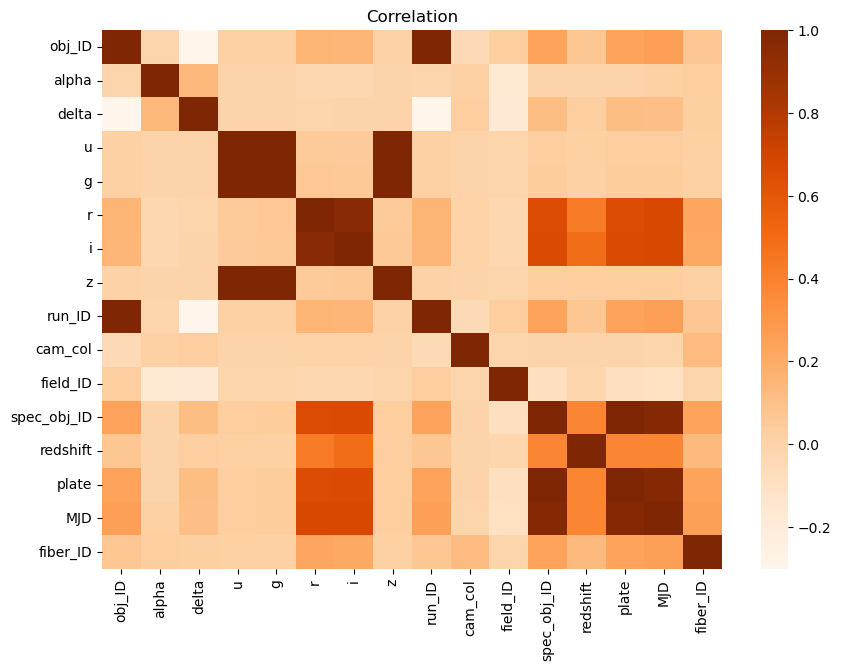

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_s_df = s_df.drop(labels=['class'], axis=1)
feature_corr = feature_s_df.corr()

fig = plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(feature_corr, cmap='Oranges')
heatmap.set_title('Correlation')
plt.show()

- target('class')와의 상관관계를 확인해보기 위해, 레이블 인코딩을 진행합니다.

In [11]:
from sklearn.preprocessing import LabelEncoder

target_encoder = LabelEncoder()
targets = target_encoder.fit_transform(s_df['class'])
s_df['target'] = targets
s_df.drop(labels=['class'], axis=1, inplace=True)
s_df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,target
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,6.543777e+18,0.634794,5812,56354,171,0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,1.176014e+19,0.779136,10445,58158,427,0
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,5.152200e+18,0.644195,4576,55592,299,0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,1.030107e+19,0.932346,9149,58039,775,0
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,6.891865e+18,0.116123,6121,56187,842,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,2,581,1.055431e+19,0.000000,9374,57749,438,0
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,1,289,8.586351e+18,0.404895,7626,56934,866,0
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,4,308,3.112008e+18,0.143366,2764,54535,74,0
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,4,131,7.601080e+18,0.455040,6751,56368,470,0


In [12]:
corr = s_df.corr()
corr

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,target
obj_ID,1.000000,-0.013735,-0.301237,0.015310,0.015710,0.153891,0.147670,0.013811,1.000000,-0.046997,0.031498,0.239461,0.065400,0.239460,0.262687,0.067178,-0.036012
alpha,-0.013735,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,-0.013737,0.019582,-0.165577,-0.002553,0.001667,-0.002554,0.019943,0.030464,-0.011756
delta,-0.301237,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,-0.301238,0.032565,-0.173416,0.112329,0.031638,0.112329,0.107333,0.028250,0.014452
u,0.015310,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.015309,0.003548,-0.008374,0.029997,0.014309,0.029997,0.031997,0.016305,-0.024645
g,0.015710,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.015710,0.003508,-0.008852,0.039443,0.022954,0.039443,0.040274,0.017470,-0.020066
r,0.153891,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.153889,0.008480,-0.026423,0.655245,0.433241,0.655243,0.671180,0.223106,-0.076766
i,0.147670,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.147668,0.007615,-0.026679,0.661641,0.492383,0.661640,0.672523,0.214787,0.015028
z,0.013811,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.013811,0.003365,-0.008903,0.037813,0.030380,0.037813,0.037469,0.014668,-0.001614
run_ID,1.000000,-0.013737,-0.301238,0.015309,0.015710,0.153889,0.147668,0.013811,1.000000,-0.047098,0.031498,0.239460,0.065400,0.239459,0.262687,0.067165,-0.036014
cam_col,-0.046997,0.019582,0.032565,0.003548,0.003508,0.008480,0.007615,0.003365,-0.047098,1.000000,-0.015684,-0.001946,0.000097,-0.001949,-0.006745,0.121597,0.023138


- target과의 상관관계를 확인해봅니다.

In [13]:
corr['target'].sort_values(ascending=False)[1:]

cam_col        0.023138
i              0.015028
delta          0.014452
MJD           -0.000405
z             -0.001614
plate         -0.010060
spec_obj_ID   -0.010060
alpha         -0.011756
g             -0.020066
u             -0.024645
field_ID      -0.034833
obj_ID        -0.036012
run_ID        -0.036014
fiber_ID      -0.041586
redshift      -0.054239
r             -0.076766
Name: target, dtype: float64

- 📌target과의 상관관계가 대체로 매우 낮게 나타나지만, 우선 훈련 및 예측까지 수행하여 평가 지표를 확인해보고자 합니다.

In [14]:
s_df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,target
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,6.543777e+18,0.634794,5812,56354,171,0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,1.176014e+19,0.779136,10445,58158,427,0
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,5.152200e+18,0.644195,4576,55592,299,0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,1.030107e+19,0.932346,9149,58039,775,0
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,6.891865e+18,0.116123,6121,56187,842,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,2,581,1.055431e+19,0.000000,9374,57749,438,0
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,1,289,8.586351e+18,0.404895,7626,56934,866,0
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,4,308,3.112008e+18,0.143366,2764,54535,74,0
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,4,131,7.601080e+18,0.455040,6751,56368,470,0


#### 2. 데이터 전처리 및 훈련/학습 데이터 분리
- 히스토그램으로 보았을 때 분포가 치우쳐 나타난 u, g, z feature들의 분포를 value_counts()로 확인해봅니다.
- train_test_split()을 통해 훈련 및 학습 데이터를 분리합니다.
- 훈련 데이터에서 target의 분포를 확인하여 필요 시 undersampling 또는 oversampling을 진행합니다.

In [15]:
pre_s_df = s_df.copy()
pre_s_df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,target
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,6.543777e+18,0.634794,5812,56354,171,0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,1.176014e+19,0.779136,10445,58158,427,0
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,5.152200e+18,0.644195,4576,55592,299,0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,1.030107e+19,0.932346,9149,58039,775,0
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,6.891865e+18,0.116123,6121,56187,842,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,2,581,1.055431e+19,0.000000,9374,57749,438,0
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,1,289,8.586351e+18,0.404895,7626,56934,866,0
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,4,308,3.112008e+18,0.143366,2764,54535,74,0
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,4,131,7.601080e+18,0.455040,6751,56368,470,0


In [16]:
pre_s_df['u'].value_counts()

u
24.63465    77
24.63466    64
24.63467    44
24.63464    23
24.63468    20
            ..
20.52900     1
20.71782     1
24.04446     1
26.04562     1
22.62171     1
Name: count, Length: 93748, dtype: int64

<Axes: >

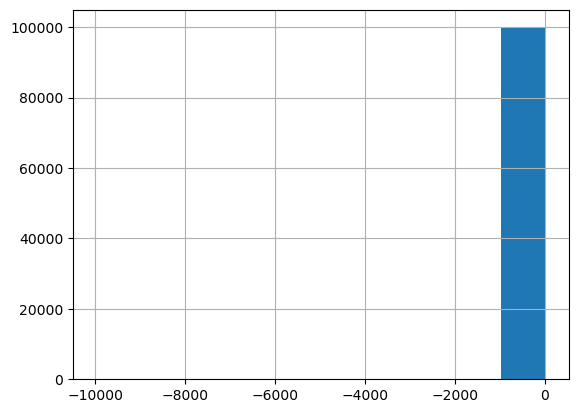

In [17]:
pre_s_df['u'].hist()

In [18]:
pre_s_df[['u']].describe().T

,count,mean,std,min,25%,50%,75%,max
u,100000.0,21.980468,31.769291,-9999.0,20.352353,22.179135,23.68744,32.78139


- 📌'u' feature에서 최솟값이 -9999로, 평균값이나 최댓값, 4분위값을 기준으로 했을 때 이상치로 판단됩니다.

In [19]:
pre_s_df[['g']].describe().T

,count,mean,std,min,25%,50%,75%,max
g,100000.0,20.531387,31.750292,-9999.0,18.96523,21.099835,22.123767,31.60224


- 📌'g' feature 또한 최솟값이 -9999로, 평균값이나 최댓값, 4분위값을 기준으로 했을 때 이상치로 판단됩니다.

In [20]:
pre_s_df[['z']].describe().T

,count,mean,std,min,25%,50%,75%,max
z,100000.0,18.66881,31.728152,-9999.0,17.460677,19.004595,19.92112,29.38374


- 📌'z' feature 또한 최솟값이 -9999로, 평균값이나 최댓값, 4분위값을 기준으로 했을 때 이상치로 판단됩니다.

- 🎈히스토그램으로 보았을 때 u, g, z feature는 하나의 값만을 가진 것으로 판단하여 컬럼을 삭제하려 하였으나,  
  describe().T로 확인해보았을 때 이상치로 인하여 치우친 분포를 나타냈던 것을 알 수 있습니다.
- 따라서 전체 feature에 대해 StandardScaler()를 통해 표준화를 진행한 후 이상치를 제거하고자 합니다.

In [21]:
from sklearn.preprocessing import StandardScaler

features = pre_s_df.iloc[:, :-1]

std = StandardScaler()
std_features = std.fit_transform(features)
std_s_df = pd.DataFrame(std_features, columns=features.columns)
std_s_df['target'] = pre_s_df['target']
std_s_df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,target
0,-0.445634,-0.434604,0.425529,0.059755,0.054926,0.403962,0.046007,0.003937,-0.445535,-0.952553,-0.718947,0.228609,0.079557,0.228633,0.423203,-1.021342,0
1,0.018740,-0.339921,0.363402,0.088045,0.072456,1.584406,1.185097,0.092835,0.018646,0.937920,-0.450509,1.797912,0.277096,1.797924,1.420729,-0.081883,0
2,-0.445633,-0.367251,0.582713,0.103327,0.067165,0.519745,0.150019,0.008808,-0.445535,-0.952553,-0.443798,-0.190037,0.092423,-0.190025,0.001854,-0.551612,0
3,-0.147311,1.669523,-1.249105,0.004921,0.102210,1.059904,0.807610,0.018321,-0.147278,-0.322395,0.187031,1.358962,0.486770,1.358942,1.354927,1.195196,0
4,1.842768,1.737310,-0.150242,-0.080055,-0.092948,-1.697421,-1.767887,-0.098468,1.842792,-0.322395,-0.329712,0.333328,-0.630267,0.333297,0.330860,1.441070,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.677801,-1.430113,-1.360650,0.005890,0.076991,1.217564,1.263237,0.065144,1.677886,-0.952553,2.649947,1.435146,-0.789186,1.435155,1.194571,-0.041515,0
99996,1.748482,-1.535053,-0.220744,0.022371,0.058422,0.433626,0.382696,0.023527,1.748632,-1.582710,0.690351,0.843101,-0.235069,0.843071,0.743915,1.529144,0
99997,0.423819,0.486606,-0.429360,-0.025538,-0.039730,-0.777184,-0.793290,-0.041496,0.423785,0.307763,0.817859,-0.803813,-0.592984,-0.803786,-0.582617,-1.377309,0
99998,-0.423111,0.358952,1.146631,0.106075,0.034840,0.144547,-0.007005,-0.001386,-0.423140,0.307763,-0.369978,0.546690,-0.166444,0.546691,0.430945,0.075917,0


- 표준화를 진행한 std_s_df에서 target을 제외한 feature들에 대해 이상치를 제거합니다.

In [22]:
for feature in std_s_df.iloc[:, :-1].columns:
    print(f'{feature}: {std_s_df[~std_s_df[feature].between(-1.96, 1.96)].shape[0]}건')

obj_ID: 225건
alpha: 0건
delta: 1926건
u: 1건
g: 1건
r: 3555건
i: 3270건
z: 1건
run_ID: 225건
cam_col: 0건
field_ID: 5426건
spec_obj_ID: 2597건
redshift: 6256건
plate: 2597건
MJD: 2446건
fiber_ID: 1162건


In [23]:
for feature in std_s_df.iloc[:, :-1].columns:
    std_s_df.drop(std_s_df[~std_s_df[feature].between(-1.96, 1.96)].index, axis=0, inplace=True)

In [24]:
for feature in std_s_df.iloc[:, :-1].columns:
    print(f'{feature}: {std_s_df[~std_s_df[feature].between(-1.96, 1.96)].shape[0]}건')

obj_ID: 0건
alpha: 0건
delta: 0건
u: 0건
g: 0건
r: 0건
i: 0건
z: 0건
run_ID: 0건
cam_col: 0건
field_ID: 0건
spec_obj_ID: 0건
redshift: 0건
plate: 0건
MJD: 0건
fiber_ID: 0건


- 이상치를 제거한 후 히스토그램으로 분포를 확인해봅니다.

array([[<Axes: title={'center': 'obj_ID'}>,
        <Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'delta'}>, <Axes: title={'center': 'u'}>],
       [<Axes: title={'center': 'g'}>, <Axes: title={'center': 'r'}>,
        <Axes: title={'center': 'i'}>, <Axes: title={'center': 'z'}>],
       [<Axes: title={'center': 'run_ID'}>,
        <Axes: title={'center': 'cam_col'}>,
        <Axes: title={'center': 'field_ID'}>,
        <Axes: title={'center': 'spec_obj_ID'}>],
       [<Axes: title={'center': 'redshift'}>,
        <Axes: title={'center': 'plate'}>,
        <Axes: title={'center': 'MJD'}>,
        <Axes: title={'center': 'fiber_ID'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

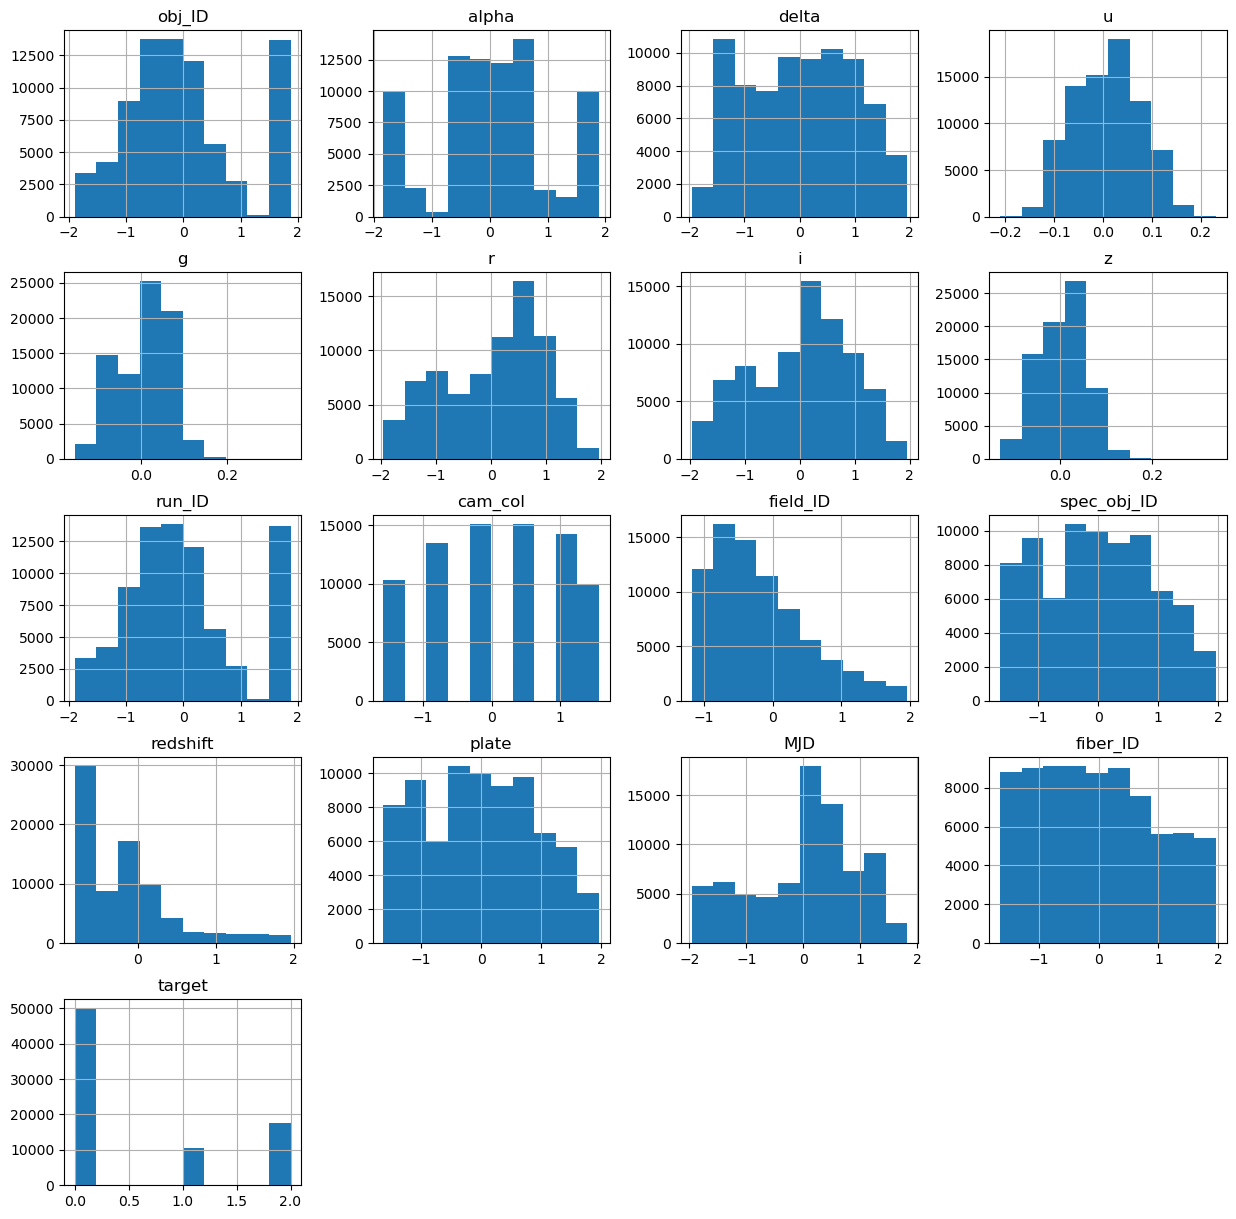

In [25]:
std_s_df.hist(figsize=(15, 15))

- 고유한 ID값을 나타내는 feature들(obj_ID, run_ID, field_ID, spec_obj_ID, fiber_ID)은 훈련에 불필요하다고 판단하여 삭제하기로 합니다.

In [26]:
std_s_df.drop(labels=['obj_ID', 'run_ID', 'field_ID', 'spec_obj_ID', 'fiber_ID'], axis=1, inplace=True)
std_s_df

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD,target
0,-0.434604,0.425529,0.059755,0.054926,0.403962,0.046007,0.003937,-0.952553,0.079557,0.228633,0.423203,0
1,-0.339921,0.363402,0.088045,0.072456,1.584406,1.185097,0.092835,0.937920,0.277096,1.797924,1.420729,0
2,-0.367251,0.582713,0.103327,0.067165,0.519745,0.150019,0.008808,-0.952553,0.092423,-0.190025,0.001854,0
3,1.669523,-1.249105,0.004921,0.102210,1.059904,0.807610,0.018321,-0.322395,0.486770,1.358942,1.354927,0
4,1.737310,-0.150242,-0.080055,-0.092948,-1.697421,-1.767887,-0.098468,-0.322395,-0.630267,0.333297,0.330860,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1.446791,-1.263329,-0.031956,-0.022524,-0.163851,0.035415,0.012263,-0.952553,-0.549408,-1.392821,-1.299242,0
99996,-1.535053,-0.220744,0.022371,0.058422,0.433626,0.382696,0.023527,-1.582710,-0.235069,0.843071,0.743915,0
99997,0.486606,-0.429360,-0.025538,-0.039730,-0.777184,-0.793290,-0.041496,0.307763,-0.592984,-0.803786,-0.582617,0
99998,0.358952,1.146631,0.106075,0.034840,0.144547,-0.007005,-0.001386,0.307763,-0.166444,0.546691,0.430945,0


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'delta'}>, <Axes: title={'center': 'u'}>],
       [<Axes: title={'center': 'g'}>, <Axes: title={'center': 'r'}>,
        <Axes: title={'center': 'i'}>],
       [<Axes: title={'center': 'z'}>,
        <Axes: title={'center': 'cam_col'}>,
        <Axes: title={'center': 'redshift'}>],
       [<Axes: title={'center': 'plate'}>,
        <Axes: title={'center': 'MJD'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

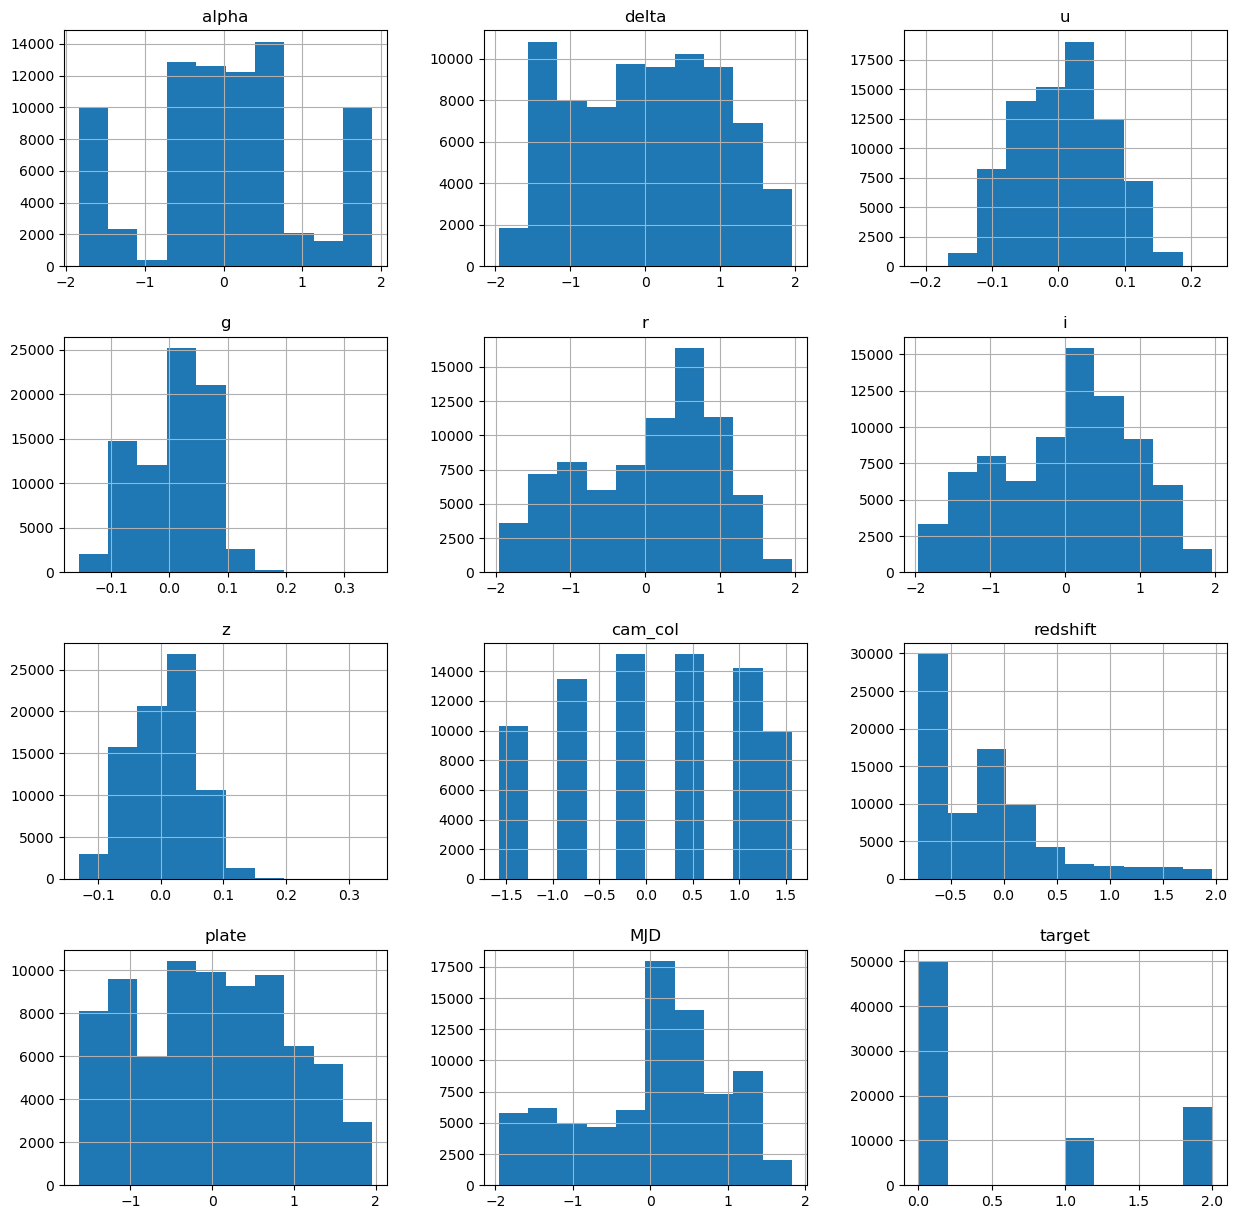

In [27]:
std_s_df.hist(figsize=(15, 15))

- target 데이터의 비중을 확인해봅니다.

In [28]:
std_s_df['target'].value_counts()

target
0    50116
2    17460
1    10633
Name: count, dtype: int64

- 분포 비중이 맞지 않으므로 SMOTE를 통해 oversampling을 진행하기로 하고, 먼저 train_test_split()을 통해 훈련 및 테스트 데이터를 분리합니다.

In [29]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

features, targets = std_s_df.iloc[:, :-1], std_s_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)
smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [30]:
y_train_over.value_counts()

target
0    40093
2    40093
1    40093
Name: count, dtype: int64

---
#### 3. 모델 훈련, 예측 및 평가
- DTC  
- SVC  
- KNN  
- Ensemble(Hard/soft Voting[DTC, SVC, KNN], Bagging[RFC], Boosting[AdaBoost, GBM, XGB, LightGBM])
- 각각 GridSearchCV를 통해 최적의 하이퍼 파라미터 탐색을 동시에 진행합니다.

##### 1) DTC(Decision Tree Classifier) 분류 모델

- 먼저 GridSearchCV를 확인하기 전, 하이퍼 파라미터 조정 없이 DTC를 통해 훈련 및 예측을 수행한 후 feature별 중요도를 시각화해봅니다.

In [109]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train_over, y_train_over)

DecisionTreeClassifier()

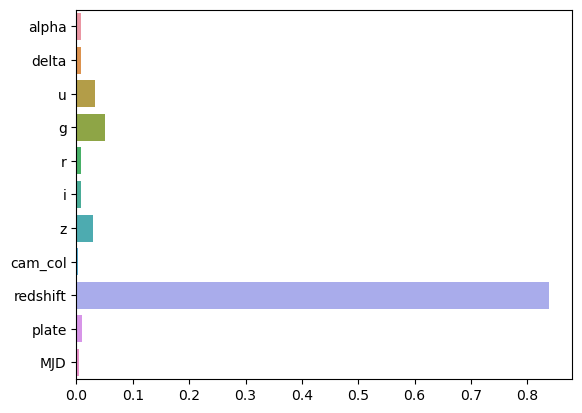

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

- 중요도가 가장 높은 상위 2개 feature(redshift, u)를 산점도로 시각화해봅니다.

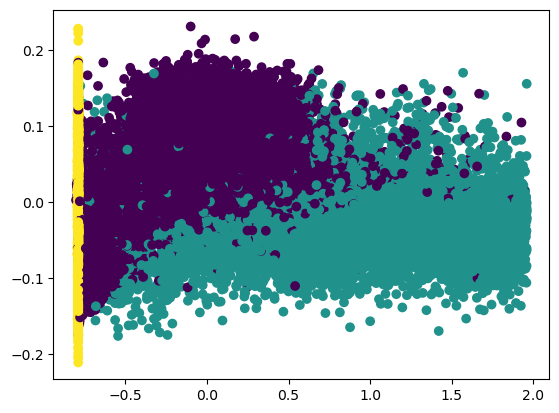

In [111]:
plt.scatter(features.iloc[:, -3], features.iloc[:, 2], c=targets)
plt.show()

- 결정 경계를 시각화해봅니다.

In [112]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


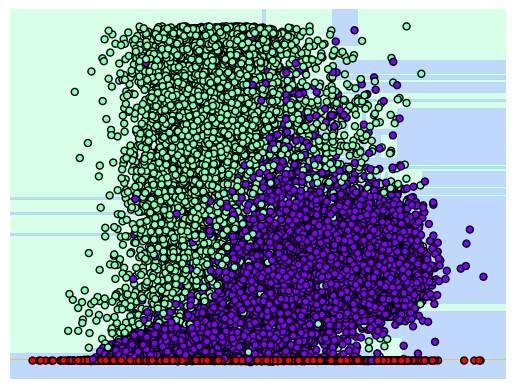

In [113]:
from copy import deepcopy

features_dtc = deepcopy(dtc)
features_2_8 = features.iloc[:, [2, 8]]
visualize_boundary(features_dtc, features_2_8, targets)

- 과적합이 발생했다고 판단하여, GridSearchCV를 통해 최적의 하이퍼 파라미터 값을 찾아 조정하고자 합니다.

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()

parameters = {
    'max_depth': [5, 6, 7],
    'min_samples_split': [7, 8, 9]
}

g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [7, 8, 9]},
             return_train_score=True)

In [115]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 5, 'min_samples_split': 7}",0.955412,7
1,"{'max_depth': 5, 'min_samples_split': 8}",0.955412,7
2,"{'max_depth': 5, 'min_samples_split': 9}",0.955412,7
3,"{'max_depth': 6, 'min_samples_split': 7}",0.960633,5
4,"{'max_depth': 6, 'min_samples_split': 8}",0.960642,4
5,"{'max_depth': 6, 'min_samples_split': 9}",0.960633,5
6,"{'max_depth': 7, 'min_samples_split': 7}",0.963335,1
7,"{'max_depth': 7, 'min_samples_split': 8}",0.963319,2
8,"{'max_depth': 7, 'min_samples_split': 9}",0.963302,3


In [116]:
dtc = g_dtc.best_estimator_

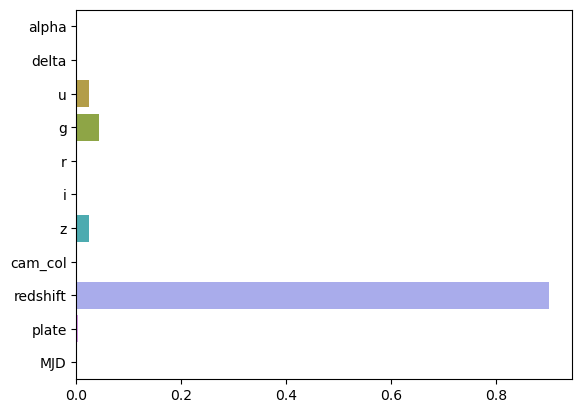

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

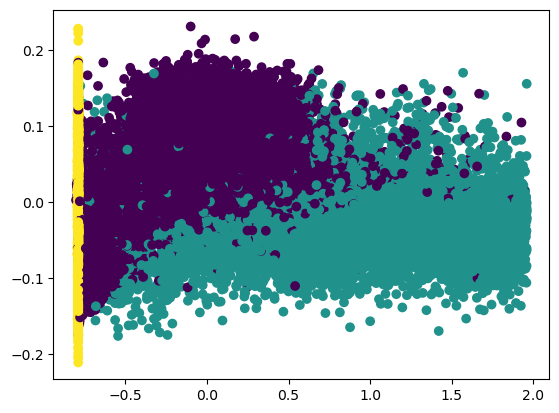

In [118]:
plt.scatter(features.iloc[:, -3], features.iloc[:, 2], c=targets)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


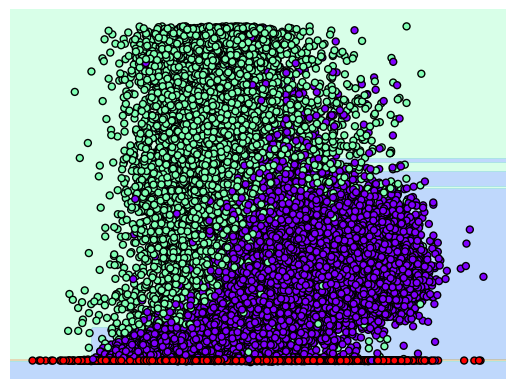

In [119]:
from copy import deepcopy

features_dtc = deepcopy(dtc)
features_2_8 = features.iloc[:, [2, 8]]
visualize_boundary(features_dtc, features_2_8, targets)

- 📌이전보다 과적합이 많이 줄어들었음을 확인할 수 있습니다.

- 오차 행렬을 시각화해봅니다.

In [120]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [121]:
dtc_prediction = dtc.predict(X_test)

오차 행렬
[[9523  460   40]
 [ 175 1952    0]
 [   2    0 3490]]
정확도: 0.9567, 정밀도: 0.9266, 재현율: 0.9558, F1: 0.9399
################################################################################


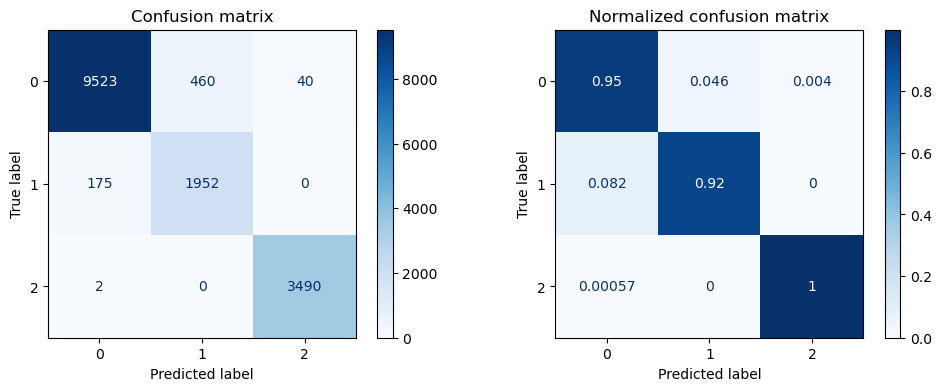

In [122]:
get_evaluation(y_test, dtc_prediction, dtc, X_test)

##### 2) SVC(Support Vector machine Classifier) 분류 모델
- 앞서 StandardScaler을 통해 스케일링을 진행하였으므로, 따로 파이프라인을 구축할 필요는 없다고 판단됩니다.

- 다만, 데이터의 수가 많아 LinearSVC를 통해 linear kernel로 학습시킨 후 오차행렬을 구해봅니다.

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

l_svc_parameters = {
    'C': [0.001, 0.01, 0.1]
}

l_svc = LinearSVC(verbose=True)

g_l_svc = GridSearchCV(l_svc, param_grid=l_svc_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)
g_l_svc.fit(X_train_over, y_train_over)

[LibLinear]

GridSearchCV(cv=3, estimator=LinearSVC(verbose=True), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1]}, return_train_score=True)

In [124]:
l_svc_result_df = pd.DataFrame(g_l_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(l_svc_result_df)

,params,mean_test_score,rank_test_score
0,{'C': 0.001},0.889274,3
1,{'C': 0.01},0.917209,2
2,{'C': 0.1},0.935018,1


In [127]:
l_svc2_parameters = {
    'C': [1, 10, 100]
}

l_svc2 = LinearSVC(verbose=True)

g_l_svc2 = GridSearchCV(l_svc2, param_grid=l_svc2_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)
g_l_svc2.fit(X_train_over, y_train_over)

[LibLinear]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=3, estimator=LinearSVC(verbose=True), n_jobs=-1,
             param_grid={'C': [1, 10, 100]}, return_train_score=True)

In [128]:
l_svc2_result_df = pd.DataFrame(g_l_svc2.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(l_svc2_result_df)

,params,mean_test_score,rank_test_score
0,{'C': 1},0.941153,2
1,{'C': 10},0.943465,1
2,{'C': 100},0.926438,3


- C=10 일 때의 평균 test_score가 가장 높음을 확인할 수 있습니다.

In [129]:
svc = g_l_svc2.best_estimator_
svc_prediction = svc.predict(X_test)

- 오차 행렬을 시각화해봅니다.

오차 행렬
[[8852 1031  140]
 [ 150 1977    0]
 [  37    0 3455]]
정확도: 0.9132, 정밀도: 0.8659, 재현율: 0.9340, F1: 0.8913
################################################################################


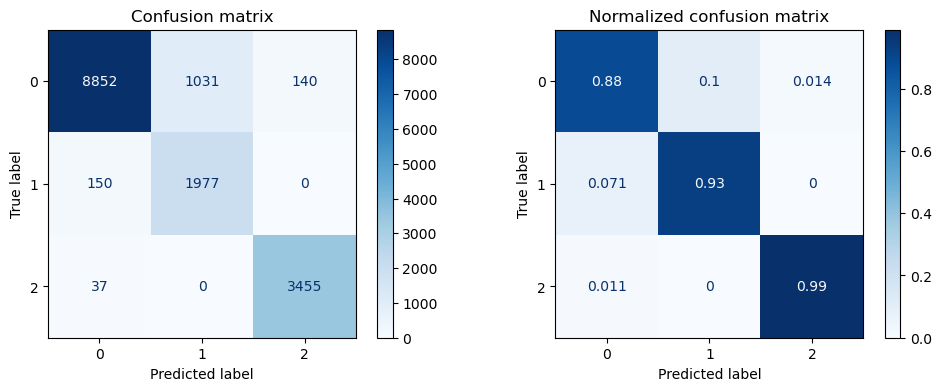

In [130]:
get_evaluation(y_test, svc_prediction, svc, X_test)

##### 3) KNN(K-Nearest Neighbors) 분류 모델

In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_parameters = {
    'n_neighbors': [3, 5, 7]
}

g_knn = GridSearchCV(knn, param_grid=knn_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7]}, return_train_score=True)

In [132]:
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(knn_result_df)

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 3},0.962296,1
1,{'n_neighbors': 5},0.955894,2
2,{'n_neighbors': 7},0.950557,3


- n_neighbors=3 일 때 평균 test_score가 가장 높았음을 확인할 수 있습니다.

In [133]:
knn = g_knn.best_estimator_
knn_prediction = knn.predict(X_test)

- 오차 행렬을 시각화해봅니다.

오차 행렬
[[9270  387  366]
 [ 260 1850   17]
 [ 208    9 3275]]
정확도: 0.9203, 정밀도: 0.8903, 재현율: 0.9108, F1: 0.9001
################################################################################


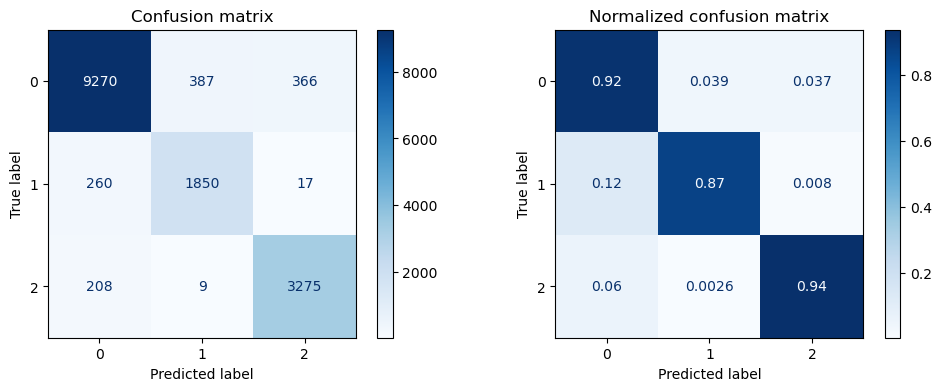

In [134]:
get_evaluation(y_test, knn_prediction, knn, X_test)

##### 4) Ensemble - RandomForestClassifier(Bagging)

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc_parameters = {
    'max_depth': [10, 11, 12],
    'min_samples_split': [10, 11, 12]
}

rfc = RandomForestClassifier(n_estimators=50)

g_rfc = GridSearchCV(rfc, param_grid=rfc_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

g_rfc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=50), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_split': [10, 11, 12]},
             return_train_score=True)

In [136]:
rfc_result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(rfc_result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 10, 'min_samples_split': 10}",0.971624,7
1,"{'max_depth': 10, 'min_samples_split': 11}",0.971408,9
2,"{'max_depth': 10, 'min_samples_split': 12}",0.971508,8
3,"{'max_depth': 11, 'min_samples_split': 10}",0.972971,5
4,"{'max_depth': 11, 'min_samples_split': 11}",0.972921,6
5,"{'max_depth': 11, 'min_samples_split': 12}",0.973054,4
6,"{'max_depth': 12, 'min_samples_split': 10}",0.974326,1
7,"{'max_depth': 12, 'min_samples_split': 11}",0.974077,2
8,"{'max_depth': 12, 'min_samples_split': 12}",0.973877,3


In [137]:
rfc = g_rfc.best_estimator_
rfc_prediction = rfc.predict(X_test)

- 오차 행렬을 시각화해봅니다.

오차 행렬
[[9714  243   66]
 [ 162 1965    0]
 [   0    0 3492]]
정확도: 0.9699, 정밀도: 0.9517, 재현율: 0.9643, F1: 0.9578
################################################################################


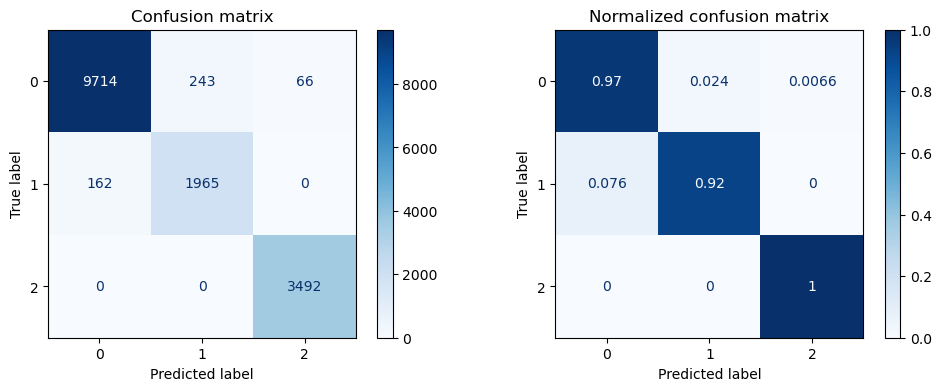

In [138]:
get_evaluation(y_test, rfc_prediction, rfc, X_test)

##### 5) Ensemble - VotingClassifier(Voting)
- (1) Hard Voting

In [139]:
from sklearn.ensemble import VotingClassifier

hard_vc = VotingClassifier(estimators=[
    ('dtc', dtc), ('svc', svc), ('knn', knn)
], voting='hard', n_jobs=-1)

hard_vc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=7,
                                                     min_samples_split=7)),
                             ('svc', LinearSVC(C=10, verbose=True)),
                             ('knn', KNeighborsClassifier(n_neighbors=3))],
                 n_jobs=-1)

In [140]:
hard_vc_prediction = hard_vc.predict(X_test)

- 오차 행렬을 시각화해봅니다.

오차 행렬
[[9555  365  103]
 [ 167 1960    0]
 [   2    0 3490]]
정확도: 0.9593, 정밀도: 0.9323, 재현율: 0.9581, F1: 0.9445
################################################################################


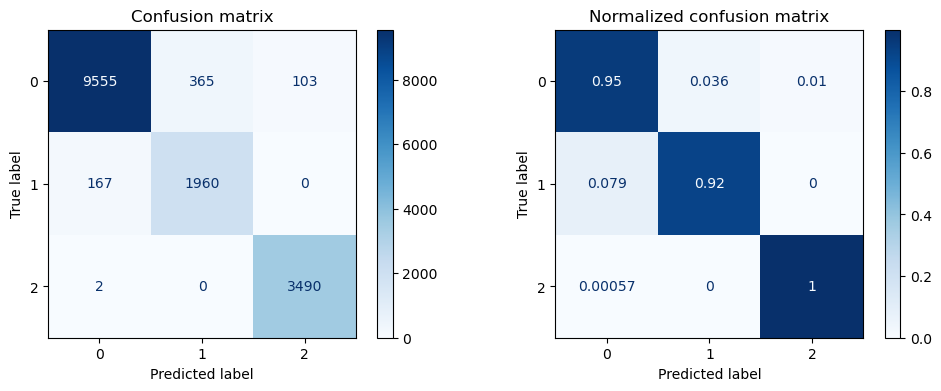

In [141]:
get_evaluation(y_test, hard_vc_prediction, hard_vc, X_test)

- (2) Soft Voting

- 앞서 사용한 LinearSVC에는 predict_proba가 없으므로, Soft Voting 시에는 CalibratedClassifierCV를 활용하여 확률을 보정합니다.

In [142]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

svc_calibrated = LinearSVC(C=0.1)
svc_calibrated.fit(X_train_over, y_train_over)
soft_svc = CalibratedClassifierCV(svc_calibrated, method='sigmoid')
soft_svc.fit(X_train_over, y_train_over)

CalibratedClassifierCV(estimator=LinearSVC(C=0.1))

In [143]:
from sklearn.ensemble import VotingClassifier

soft_vc = VotingClassifier(estimators=[
    ('dtc', dtc), ('soft_svc', soft_svc), ('knn', knn)
], voting='soft', n_jobs=-1)

soft_vc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=7,
                                                     min_samples_split=7)),
                             ('soft_svc',
                              CalibratedClassifierCV(estimator=LinearSVC(C=0.1))),
                             ('knn', KNeighborsClassifier(n_neighbors=3))],
                 n_jobs=-1, voting='soft')

In [144]:
soft_vc_prediction = soft_vc.predict(X_test)

- 오차 행렬을 시각화해봅니다.

오차 행렬
[[9617  293  113]
 [ 185 1941    1]
 [   3    0 3489]]
정확도: 0.9620, 정밀도: 0.9393, 재현율: 0.9571, F1: 0.9479
################################################################################


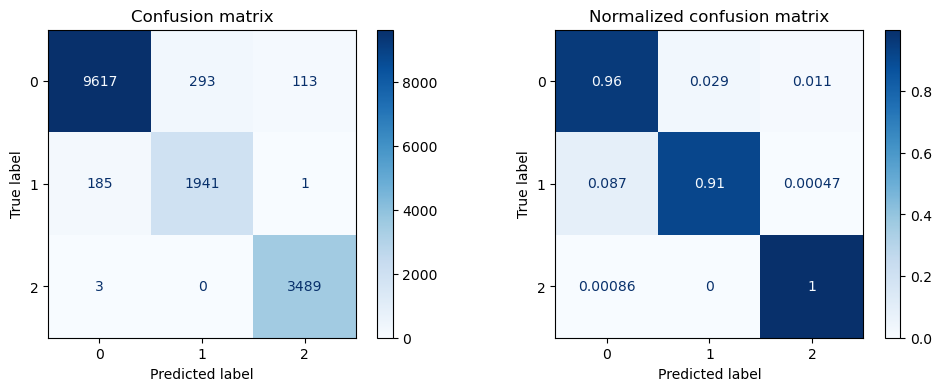

In [145]:
get_evaluation(y_test, soft_vc_prediction, soft_vc, X_test)

##### 6) Ensemble - AdaBoostClassifier(Boosting)

In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

ada_parameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_ada = GridSearchCV(AdaBoostClassifier(), param_grid=ada_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True)

In [153]:
ada_result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(ada_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.664256,3
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.655684,4
2,"{'learning_rate': 0.3, 'n_estimators': 150}",0.643396,5
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.683735,1
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.629785,6
5,"{'learning_rate': 0.5, 'n_estimators': 150}",0.610239,7
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.675446,2
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.603388,8
8,"{'learning_rate': 0.7, 'n_estimators': 150}",0.571445,9
9,"{'learning_rate': 1, 'n_estimators': 50}",0.553504,10


In [154]:
ada = g_ada.best_estimator_
ada_prediction = ada.predict(X_test)

- 오차 행렬을 시각화해봅니다.

오차 행렬
[[9280  682   61]
 [2023  104    0]
 [ 109    0 3383]]
정확도: 0.8162, 정밀도: 0.6426, 재현율: 0.6479, F1: 0.6376
################################################################################


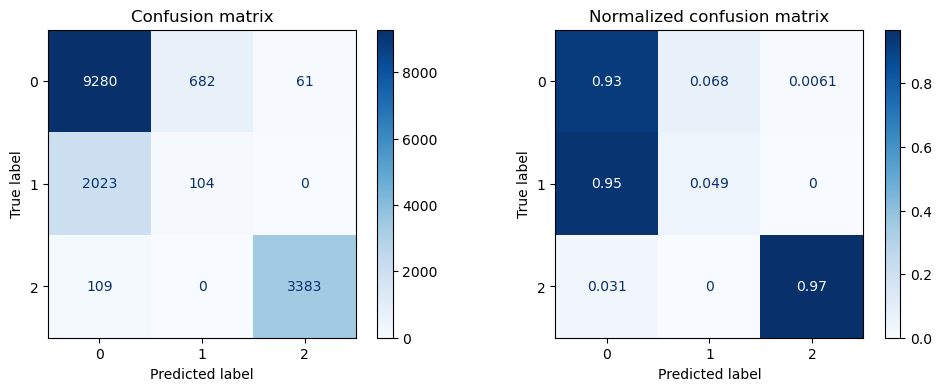

In [155]:
get_evaluation(y_test, ada_prediction, ada, X_test)

##### 7) Ensemble - GradientBoostingClassifier(Boosting)

In [156]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gbm_parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=gbm_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_gbc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [157]:
gbc_result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(gbc_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.970003,9
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.971932,6
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.973304,3
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.971267,8
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.973329,2
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.974676,1
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.971591,7
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.972456,5
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.972672,4
9,"{'learning_rate': 1, 'n_estimators': 50}",0.969687,11


In [158]:
gbc = g_gbc.best_estimator_
gbc_prediction = gbc.predict(X_test)

- 오차 행렬을 시각화해봅니다.

오차 행렬
[[9706  267   50]
 [ 167 1950   10]
 [   6    0 3486]]
정확도: 0.9680, 정밀도: 0.9484, 재현율: 0.9611, F1: 0.9546
################################################################################


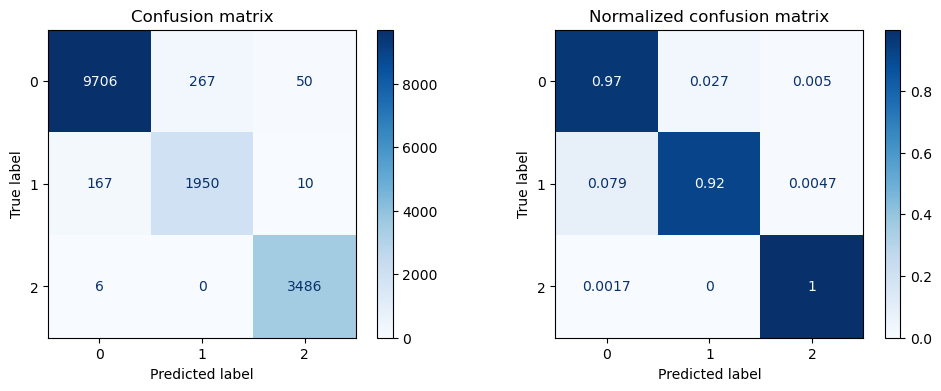

In [159]:
get_evaluation(y_test, gbc_prediction, gbc, X_test)

##### 8) Ensemble - XGBClassifier(Boosting)
- eval_set 파라미터에 전달하기 위한 검증 세트를 분리하고 진행합니다.

In [160]:
from sklearn.model_selection import train_test_split

X_val_train, X_val_test, y_val_train, y_val_test = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)
evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

In [161]:
from xgboost import XGBClassifier

xgb_parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

xgb = XGBClassifier()

g_xgb = GridSearchCV(xgb, param_grid=xgb_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

g_xgb.fit(X_train_over, y_train_over, early_stopping_rounds=50, eval_set=evals)

[0]	validation_0-mlogloss:0.74324	validation_1-mlogloss:0.74436
[1]	validation_0-mlogloss:0.54237	validation_1-mlogloss:0.54448
[2]	validation_0-mlogloss:0.41040	validation_1-mlogloss:0.41349
[3]	validation_0-mlogloss:0.32071	validation_1-mlogloss:0.32408
[4]	validation_0-mlogloss:0.25817	validation_1-mlogloss:0.26192
[5]	validation_0-mlogloss:0.21282	validation_1-mlogloss:0.21684
[6]	validation_0-mlogloss:0.18029	validation_1-mlogloss:0.18462
[7]	validation_0-mlogloss:0.15664	validation_1-mlogloss:0.16116


C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-mlogloss:0.13935	validation_1-mlogloss:0.14390
[9]	validation_0-mlogloss:0.12661	validation_1-mlogloss:0.13128
[10]	validation_0-mlogloss:0.11712	validation_1-mlogloss:0.12209
[11]	validation_0-mlogloss:0.11007	validation_1-mlogloss:0.11520
[12]	validation_0-mlogloss:0.10467	validation_1-mlogloss:0.11011
[13]	validation_0-mlogloss:0.10041	validation_1-mlogloss:0.10595
[14]	validation_0-mlogloss:0.09698	validation_1-mlogloss:0.10273
[15]	validation_0-mlogloss:0.09447	validation_1-mlogloss:0.10034
[16]	validation_0-mlogloss:0.09257	validation_1-mlogloss:0.09835
[17]	validation_0-mlogloss:0.09082	validation_1-mlogloss:0.09668
[18]	validation_0-mlogloss:0.08900	validation_1-mlogloss:0.09496
[19]	validation_0-mlogloss:0.08780	validation_1-mlogloss:0.09388
[20]	validation_0-mlogloss:0.08655	validation_1-mlogloss:0.09252
[21]	validation_0-mlogloss:0.08556	validation_1-mlogloss:0.09140
[22]	validation_0-mlogloss:0.08416	validation_1-mlogloss:0.08989
[23]	validation_0-mlogloss:

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [162]:
xgb_result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(xgb_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.974983,12
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.978957,10
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.984519,1
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.977644,11
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.981302,7
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.984237,2
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.979049,9
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.982033,6
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.984120,3
9,"{'learning_rate': 1, 'n_estimators': 50}",0.979672,8


In [163]:
xgb = g_xgb.best_estimator_
xgb_prediction = xgb.predict(X_test)

- 오차 행렬을 시각화해봅니다.

오차 행렬
[[9783  198   42]
 [ 183 1944    0]
 [  12    0 3480]]
정확도: 0.9722, 정밀도: 0.9587, 재현율: 0.9622, F1: 0.9604
################################################################################


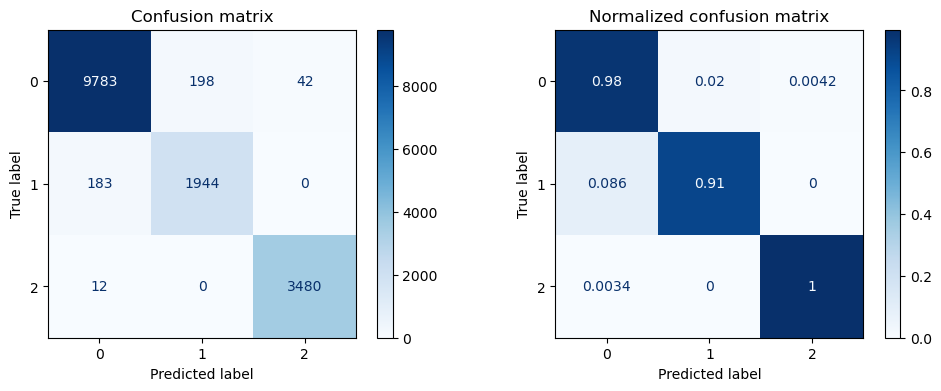

In [164]:
get_evaluation(y_test, xgb_prediction, xgb, X_test)

##### 9) Ensemble - LGBMClassifier(Boosting)
- 마찬가지로 검증 세트가 필요하므로 위에서 분리한 검증 세트를 사용합니다.

In [165]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

lgbm_parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=lgbm_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_lgbm.fit(X_train_over, y_train_over, eval_set=evals)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 120279, number of used features: 11
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [166]:
lgbm_result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(lgbm_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.974958,2
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.976347,1
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.936972,8
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.968091,3
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.962587,5
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.896939,10
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.964117,4
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.945169,7
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.905038,9
9,"{'learning_rate': 1, 'n_estimators': 50}",0.954755,6


In [167]:
lgbm = g_lgbm.best_estimator_
lgbm_prediction = lgbm.predict(X_test)

- 오차행렬을 시각화합니다.

오차 행렬
[[9699  275   49]
 [ 175 1952    0]
 [  37    0 3455]]
정확도: 0.9657, 정밀도: 0.9470, 재현율: 0.9583, F1: 0.9525
################################################################################


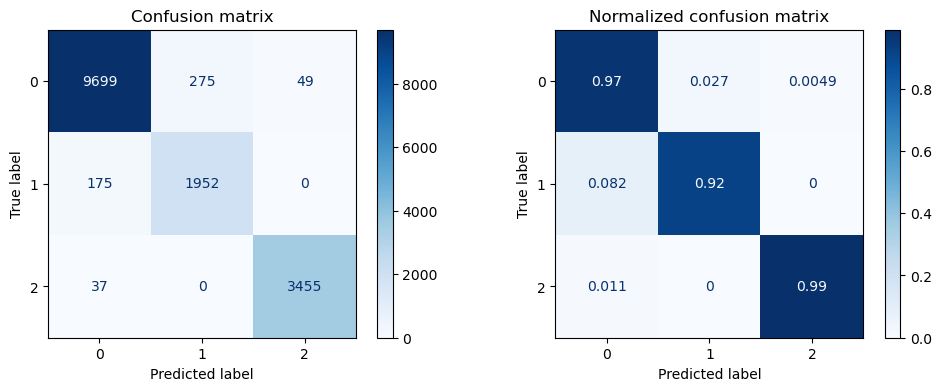

In [168]:
get_evaluation(y_test, lgbm_prediction, lgbm, X_test)

---
#### 4. 정확도 및 F1 Score 비교 시각화
- DTC, LinearSVC, KNN, RFC 의 정확도 및 F1 Score를 시각화하여 비교합니다.
- Hard/Soft Voting의 각 정확도 및 F1 Score를 시각화하여 비교합니다.
- AdaBoost, GBC, XGBoost, LightGBM의 각 정확도 및 F1 Score를 시각화하여 비교합니다.

##### 1) DTC, LinearSVC, KNN, RFC 의 정확도 및 F1 Score

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dtc_accuracy = accuracy_score(y_test, dtc_prediction)
svc_accuracy = accuracy_score(y_test, svc_prediction)
knn_accuracy = accuracy_score(y_test, knn_prediction)
rfc_accuracy = accuracy_score(y_test, rfc_prediction)

dtc_precision = precision_score(y_test, dtc_prediction, average='macro')
svc_precision = precision_score(y_test, svc_prediction, average='macro')
knn_precision = precision_score(y_test, knn_prediction, average='macro')
rfc_precision = precision_score(y_test, rfc_prediction, average='macro')

dtc_recall = recall_score(y_test, dtc_prediction, average='macro')
svc_recall = recall_score(y_test, svc_prediction, average='macro')
knn_recall = recall_score(y_test, knn_prediction, average='macro')
rfc_recall = recall_score(y_test, rfc_prediction, average='macro')

dtc_f1 = f1_score(y_test, dtc_prediction, average='macro')
svc_f1 = f1_score(y_test, svc_prediction, average='macro')
knn_f1 = f1_score(y_test, knn_prediction, average='macro')
rfc_f1 = f1_score(y_test, rfc_prediction, average='macro')

models = ['DTC', 'SVC', 'KNN', 'RFC']
accuracy_scores = [dtc_accuracy, svc_accuracy, knn_accuracy, rfc_accuracy]
precisions = [dtc_precision, svc_precision, knn_precision, rfc_precision]
recalls = [dtc_recall, svc_recall, knn_recall, rfc_recall]
f1_scores = [dtc_f1, svc_f1, knn_f1, rfc_f1]

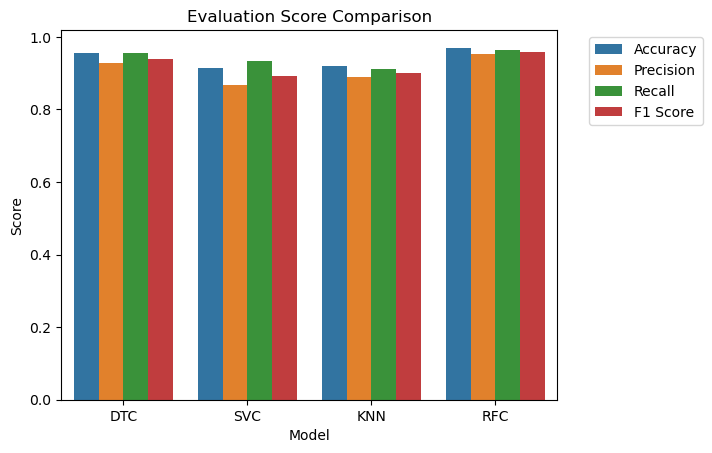

In [147]:
data = {
    'Model': models * 4,
    'Score': accuracy_scores + precisions + recalls + f1_scores,
    'Metric': ['Accuracy'] * len(models) + ['Precision'] * len(models) + ['Recall'] * len(models) + ['F1 Score'] * len(models)
}

df = pd.DataFrame(data)

sns.barplot(data=df, x='Model', y='Score', hue='Metric')

plt.title('Evaluation Score Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.show()

In [148]:
for i in range(4):
    print(f'{models[i]}의 정확도: {round(accuracy_scores[i] * 100, 4)}%, 정밀도: {round(precisions[i] * 100, 4)}%, 재현율: {round(recalls[i] * 100, 4)}%, F1 Score: {round(f1_scores[i] * 100, 4)}%')

DTC의 정확도: 95.6719%, 정밀도: 92.6569%, 재현율: 95.5755%, F1 Score: 93.9932%
SVC의 정확도: 91.3182%, 정밀도: 86.5872%, 재현율: 93.4017%, F1 Score: 89.1264%
KNN의 정확도: 92.0279%, 정밀도: 89.0308%, 재현율: 91.0833%, F1 Score: 90.0132%
RFC의 정확도: 96.9889%, 정밀도: 95.1664%, 재현율: 96.4336%, F1 Score: 95.7848%


##### 2) Hard/Soft Voting Classifier의 정확도 및 F1 Score

In [149]:
hard_accuracy = accuracy_score(y_test, hard_vc_prediction)
soft_accuracy = accuracy_score(y_test, soft_vc_prediction)

hard_precision = precision_score(y_test, hard_vc_prediction, average='macro')
soft_precision = precision_score(y_test, soft_vc_prediction, average='macro')

hard_recall = recall_score(y_test, hard_vc_prediction, average='macro')
soft_recall = recall_score(y_test, soft_vc_prediction, average='macro')

hard_f1 = f1_score(y_test, hard_vc_prediction, average='macro')
soft_f1 = f1_score(y_test, soft_vc_prediction, average='macro')

models = ['Hard Voting', 'Soft Voting']
accuracy_scores = [hard_accuracy, soft_accuracy]
precisions = [hard_precision, soft_precision]
recalls = [hard_recall, soft_recall]
f1_scores = [hard_f1, soft_f1]

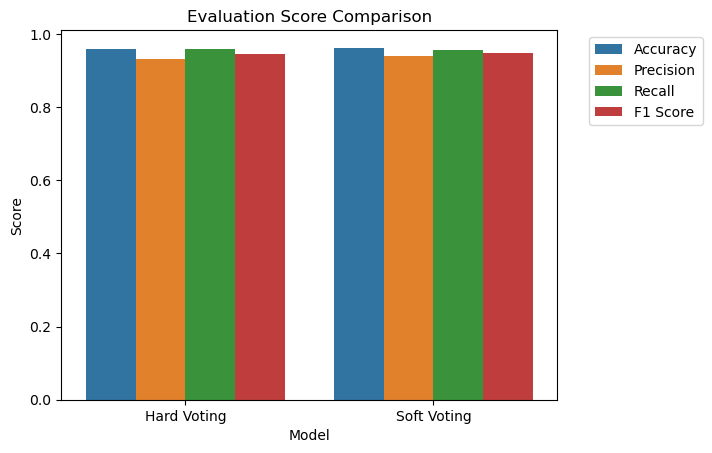

In [150]:
data = {
    'Model': models * 4,
    'Score': accuracy_scores + precisions + recalls + f1_scores,
    'Metric': ['Accuracy'] * len(models) + ['Precision'] * len(models) + ['Recall'] * len(models) + ['F1 Score'] * len(models)
}

df = pd.DataFrame(data)

sns.barplot(data=df, x='Model', y='Score', hue='Metric')

plt.title('Evaluation Score Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.show()

In [151]:
for i in range(2):
    print(f'{models[i]}의 정확도: {round(accuracy_scores[i] * 100, 4)}%, 정밀도: {round(precisions[i] * 100, 4)}%, 재현율: {round(recalls[i] * 100, 4)}%, F1 Score: {round(f1_scores[i] * 100, 4)}%')

Hard Voting의 정확도: 95.9276%, 정밀도: 93.2321%, 재현율: 95.8073%, F1 Score: 94.4475%
Soft Voting의 정확도: 96.1961%, 정밀도: 93.9344%, 재현율: 95.7062%, F1 Score: 94.7905%


##### 3) AdaBoost, GBC, XGBoost, LightGBM의 정확도 및 F1 Score

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
ada_accuracy = accuracy_score(y_test, ada_prediction)
gbc_accuracy = accuracy_score(y_test, gbc_prediction)
xgb_accuracy = accuracy_score(y_test, xgb_prediction)
lgbm_accuracy = accuracy_score(y_test, lgbm_prediction)

ada_precision = precision_score(y_test, ada_prediction, average='macro')
gbc_precision = precision_score(y_test, gbc_prediction, average='macro')
xgb_precision = precision_score(y_test, xgb_prediction, average='macro')
lgbm_precision = precision_score(y_test, lgbm_prediction, average='macro')

ada_recall = recall_score(y_test, ada_prediction, average='macro')
gbc_recall = recall_score(y_test, gbc_prediction, average='macro')
xgb_recall = recall_score(y_test, xgb_prediction, average='macro')
lgbm_recall = recall_score(y_test, lgbm_prediction, average='macro')

ada_f1 = f1_score(y_test, ada_prediction, average='macro')
gbc_f1 = f1_score(y_test, gbc_prediction, average='macro')
xgb_f1 = f1_score(y_test, xgb_prediction, average='macro')
lgbm_f1 = f1_score(y_test, lgbm_prediction, average='macro')

models = ['AdaBoost', 'GBC', 'XGBoost', 'LightGBM']
accuracy_scores = [ada_accuracy, gbc_accuracy, xgb_accuracy, lgbm_accuracy]
precisions = [ada_precision, gbc_precision, xgb_precision, lgbm_precision]
recalls = [ada_recall, gbc_recall, xgb_recall, lgbm_recall]
f1_scores = [ada_f1, gbc_f1, xgb_f1, lgbm_f1]

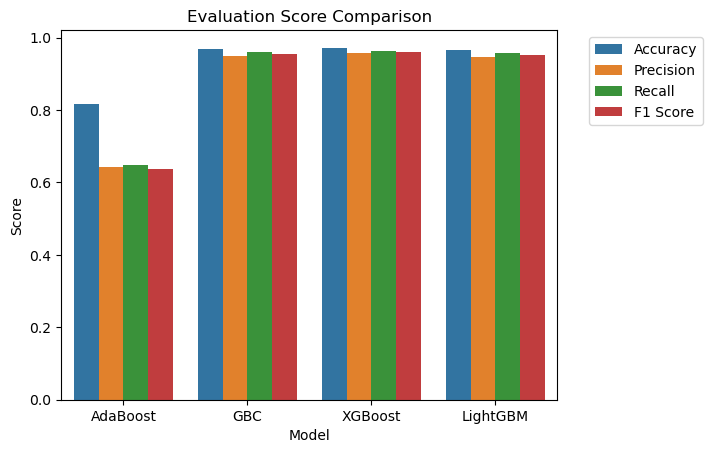

In [170]:
data = {
    'Model': models * 4,
    'Score': accuracy_scores + precisions + recalls + f1_scores,
    'Metric': ['Accuracy'] * len(models) + ['Precision'] * len(models) + ['Recall'] * len(models) + ['F1 Score'] * len(models)
}

df = pd.DataFrame(data)

sns.barplot(data=df, x='Model', y='Score', hue='Metric')

plt.title('Evaluation Score Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.show()

In [171]:
for i in range(4):
    print(f'{models[i]}의 정확도: {round(accuracy_scores[i] * 100, 4)}%, 정밀도: {round(precisions[i] * 100, 4)}%, 재현율: {round(recalls[i] * 100, 4)}%, F1 Score: {round(f1_scores[i] * 100, 4)}%')

AdaBoost의 정확도: 81.62%, 정밀도: 64.2594%, 재현율: 64.785%, F1 Score: 63.7589%
GBC의 정확도: 96.8035%, 정밀도: 94.8378%, 재현율: 96.1146%, F1 Score: 95.4597%
XGBoost의 정확도: 97.219%, 정밀도: 95.8698%, 재현율: 96.2194%, F1 Score: 96.0435%
LightGBM의 정확도: 96.5733%, 정밀도: 94.7047%, 재현율: 95.8268%, F1 Score: 95.2488%


---
### 📌모델에 따른 평가 지표 점수  

<img src="./images/star_scores01.png" width="500px"><img src="./images/star_scores02.png" width="500px"><img src="./images/star_scores03.png" width="500px">

- DTC의 정확도: 95.6719%, 정밀도: 92.6569%, 재현율: 95.5755%, F1 Score: 93.9932%
- SVC의 정확도: 91.3182%, 정밀도: 86.5872%, 재현율: 93.4017%, F1 Score: 89.1264%
- KNN의 정확도: 92.0279%, 정밀도: 89.0308%, 재현율: 91.0833%, F1 Score: 90.0132%
- RFC의 정확도: 96.9889%, 정밀도: 95.1664%, 재현율: 96.4336%, F1 Score: 95.7848%
- Hard Voting의 정확도: 95.9276%, 정밀도: 93.2321%, 재현율: 95.8073%, F1 Score: 94.4475%
- Soft Voting의 정확도: 96.1961%, 정밀도: 93.9344%, 재현율: 95.7062%, F1 Score: 94.7905%
- AdaBoost의 정확도: 81.62%, 정밀도: 64.2594%, 재현율: 64.785%, F1 Score: 63.7589%
- GBC의 정확도: 96.8035%, 정밀도: 94.8378%, 재현율: 96.1146%, F1 Score: 95.4597%
- **XGBoost의 정확도: 97.219%, 정밀도: 95.8698%, 재현율: 96.2194%, F1 Score: 96.0435%**
- LightGBM의 정확도: 96.5733%, 정밀도: 94.7047%, 재현율: 95.8268%, F1 Score: 95.2488%

### 🎈XGBoost(eXtra Gradient Boosting)Classifier 모델로 훈련했을 때 가장 높은 성능을 보였습니다.
- 모든 feature가 target(종속 변수)과 매우 낮은 상관관계를 보였음에도 불구하고 매우 높은 분류 정확도를 나타냈습니다.

- 다만, 과적합의 우려가 있으므로 상황에 따라 상대적으로 평가 지표 점수는 낮지만 시간 및 공간 복잡도가 낮은 LightGBM 모델이 더 권장될 수 있습니다.